## Multiple Linear Regression

### Bike Sharing Case Study

* Problem Statement:

A US based bike-sharing company provides a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. The company recently suffered loss in their revenues due to ongoing Corona pandemic. The Bike Company wants prepare themselves to cater to people's need once situation gets better and now they want to understand how the independent variables impact the bike demands in the American Market. Basically the company wants to understand the demand dynamics so that they can plan better and make profit in the market.


In [2]:
# Importing the libraries for data understanding 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Importing libraries for model creation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Step 1

### Reading and uderstading the bike sharing data
 * Look for data shape and size
 * Look for missing values or null values
 * Look for how data is described

In [198]:
# Reading the data using pandas read_csv method
bike_share_df = pd.read_csv('day.csv') 


In [199]:
# get dataframe shape and size information
bike_share_df.shape

(730, 16)

In [200]:
# Have a look how data looks like

bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [201]:
# Total we have total 730 rows and 16 columns 
# Except one column 'dteday' all are either int or float
# No null values are present in the dataset

# Now we can see there is no null values present in the data set
# lets have a look how data is distributed

bike_share_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [202]:
# Data cleaning or removing the columns that mayu not be required

# removing column instant, since it is index and will have unique values 

bike_share_df.instant.value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [203]:
# drop the instant columns 

bike_share_df = bike_share_df.drop(columns=['instant'], axis=1)

In [204]:
bike_share_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [205]:
# drop the dteday column as well since we already have yr and month, we may need to convert yr in proper format
bike_share_df = bike_share_df.drop(columns=['dteday'], axis=1)
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [206]:
# fetch some rows 
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [207]:
# we can also drop the casual and registered columns since we want the demand in total and not by category 
# and since cnt = casual + registered hence dropping these columns

bike_share_df = bike_share_df.drop(columns=['casual'], axis=1)
bike_share_df = bike_share_df.drop(columns=['registered'], axis=1)
bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [208]:
bike_share_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [209]:
bike_share_df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [210]:
bike_share_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [211]:
bike_share_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [212]:
# just to double sure for null values
bike_share_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [213]:
# Now let's convert the some of numeric data to categorical data 

# season, yr, weathersit, mnth, holiday, weekday, workingday are all categories

# temp, atemp, hum, windspeed, cnt are all numerical data continuous varaibles
bike_share_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


<Figure size 720x1080 with 0 Axes>

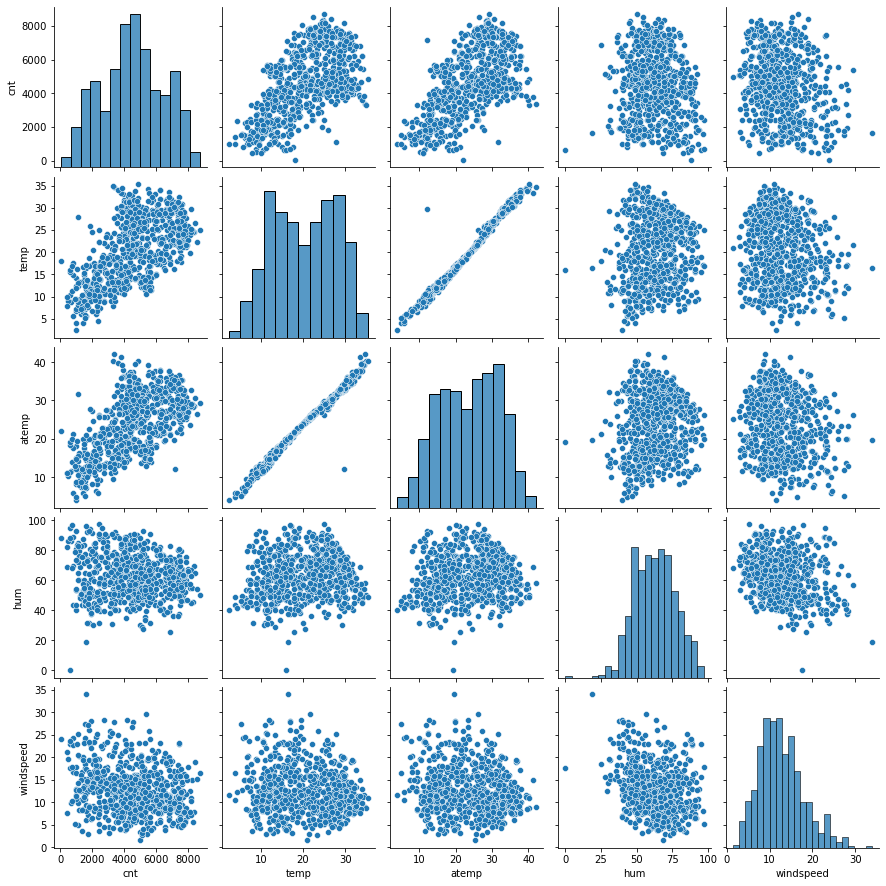

In [214]:
# Understanding via graph how the continuous variables are impact the cnt target variable
plt.figure(figsize=(10, 15))
num_variables = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
sns.pairplot(bike_share_df, vars=num_variables)
plt.show()

# Understanding the plot 

#### temp vs atemp
 They seems like to be directly related as assumed beacause they both are temperature i.e highly cor-related, we should be removing one of the columns
 There is also seems like some good correlation with cnt vs temp or  cnt vs atemp


In [215]:
# Find out the correlation for continuous numerical variables
bike_share_df[num_variables].corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


## Step 2

### Data visualization and understanding the data more
*  Lets' visualize the data using the matplotlib and seaborn

<AxesSubplot:>

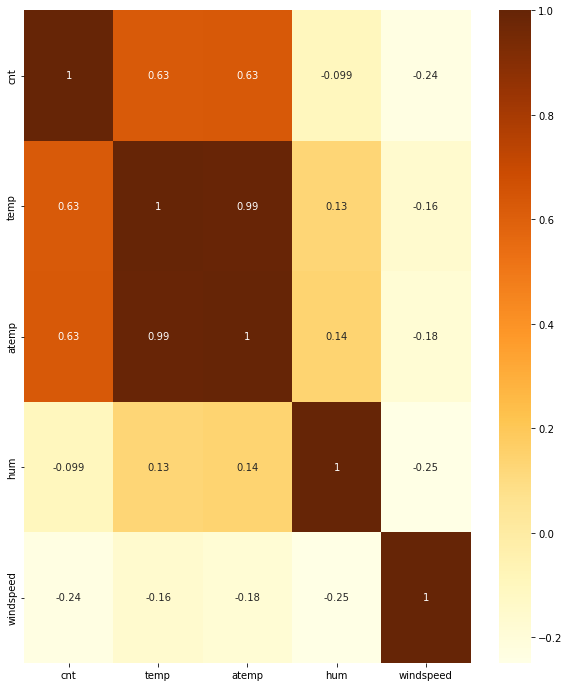

In [216]:
plt.figure(figsize=(10,12))
sns.heatmap(bike_share_df[num_variables].corr(), annot=True, cmap='YlOrBr' )

### Like above graph shows there is 99% correlation between temp and atemp

<AxesSubplot:>

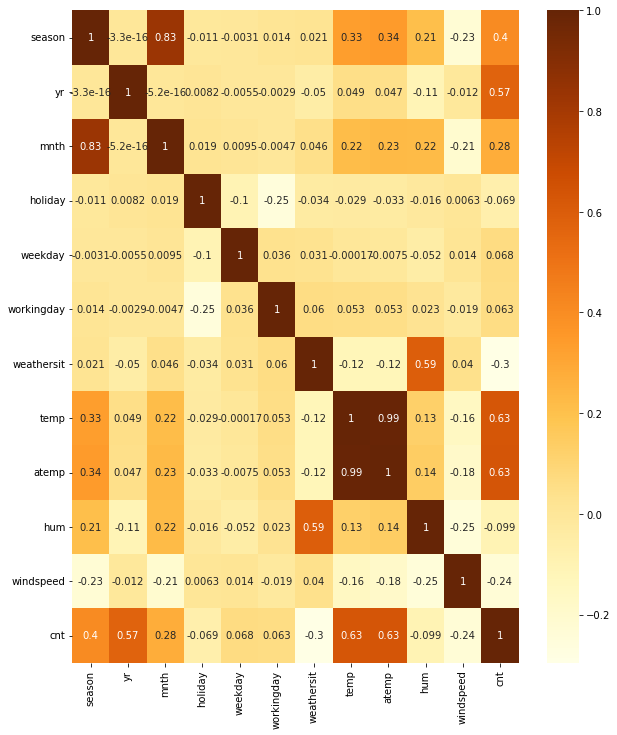

In [217]:
# Plot the heatmap of all the variables 
plt.figure(figsize=(10,12))
sns.heatmap(bike_share_df.corr(), annot=True, cmap='YlOrBr' )

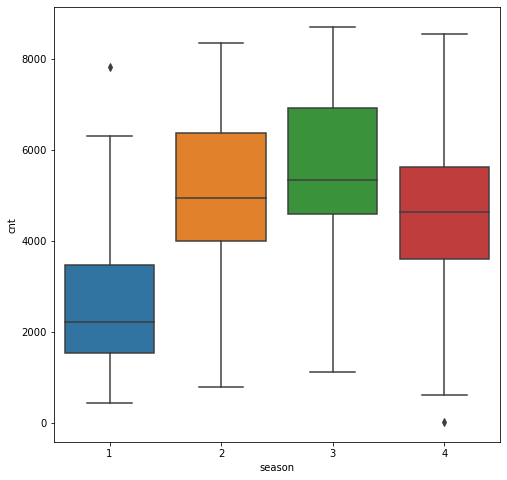

In [218]:
#  season, yr, weathersit, mnth, holiday, weekday, workingday

# Plot graph between the categorical values and lets understand the how data looks like for categorical type

# season (1:spring, 2:summer, 3:fall, 4:winter)

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='season', y='cnt')

plt.show()

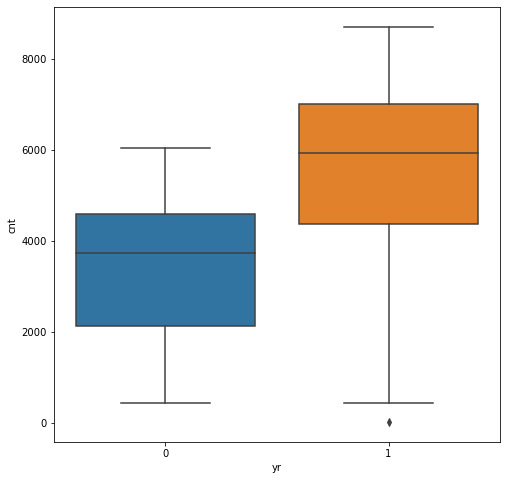

In [219]:
# year (0: 2018, 1:2019)

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='yr', y='cnt')

plt.show()

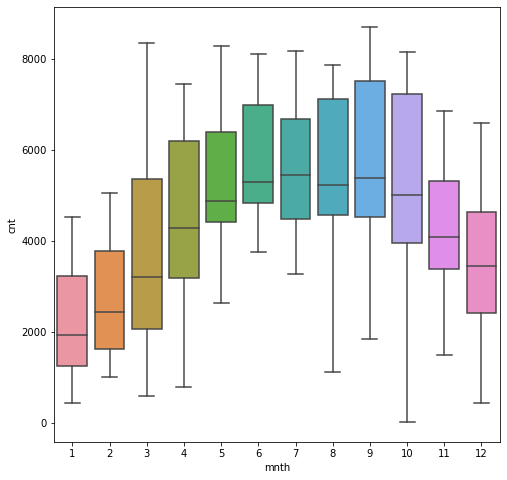

In [220]:
# month ( 1 to 12)  1 for Jan to 12 for Dec

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='mnth', y='cnt')

plt.show()

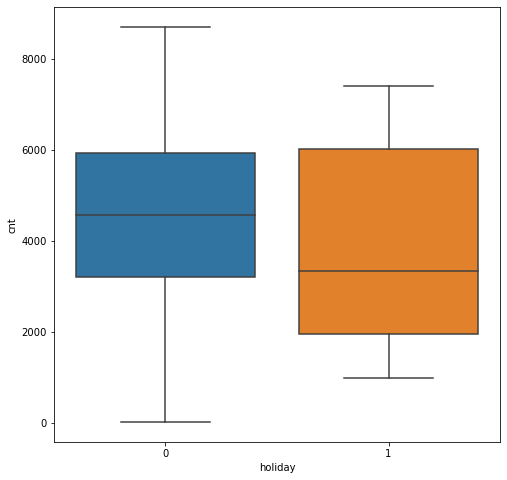

In [221]:
# O means no holiday, 1 means holiday
plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='holiday', y='cnt')

plt.show()

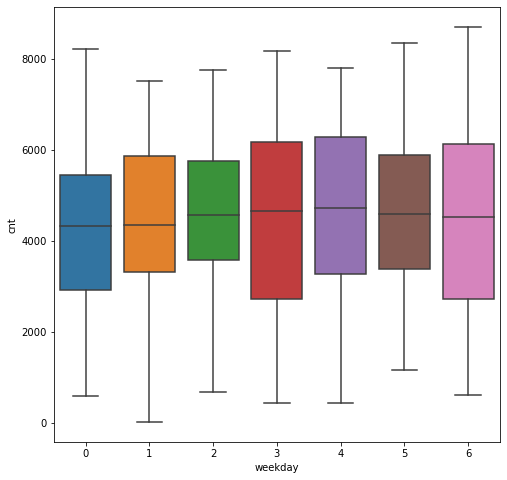

In [222]:
# Working dat from 0 to 6. Assuming 0 means Sunday and 6 being Saturday

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='weekday', y='cnt')

plt.show()

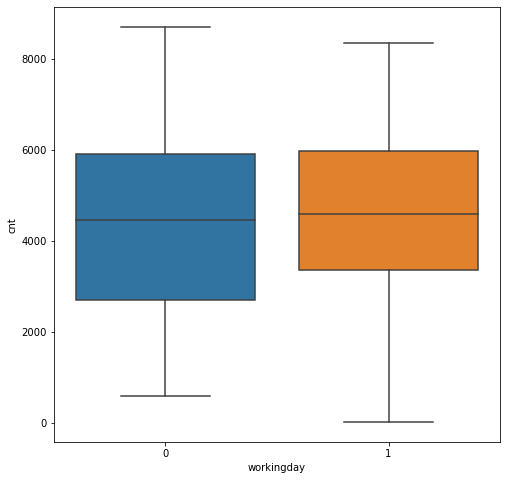

In [223]:
# Working day 1 holiday 0

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='workingday', y='cnt')

plt.show()

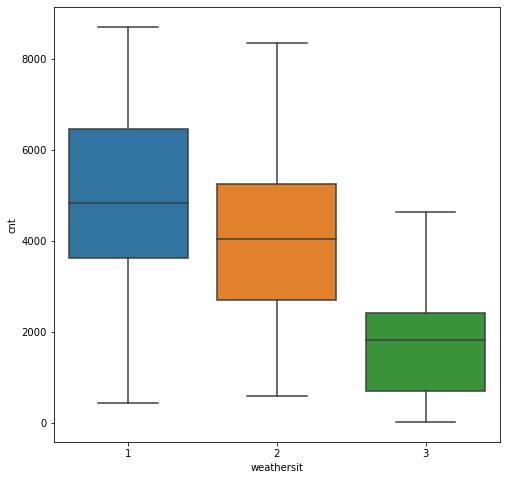

In [224]:
# 	      Weathersit : 
# 		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy ----> Good
# 		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ----> Average 
# 		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ----> Bad 
# 		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ---->  Very Bad

plt.figure(figsize=(8,8))

sns.boxplot(data=bike_share_df, x='weathersit', y='cnt')

plt.show()

###  Analysis of above graph 

- Season 3 alias Fall has seen more demands for bike as compared to other seasons
- Year 1 alias 2019 has seen more demands that previous year
- Bike demands show some pattern while anaysis monthly demands. The demands increasing from Jan to June and then some decline and then highest in *September* and then demand continues to decrease
- Working day has more demands for bike than holidays
- There are random demands in weekdays 
- Again, workingday seems to have more demands for bike than holidays or weekends 
    - Here one thing to ponder over is that column holiday seems to be subset of workingday(includes both weekends and holidays) The moot point is can we remove this 'holiday' column ?
- There is highest demand for bike when weathersit is 1 means clear sky or Good weather and demands tend to decrease as weather
  tends to detoriate and not demands when weathersit is 4 or very bad weather.

In [225]:
# We have some initial analysis and it seems like we can move for Linear Regression 

# We already have categorical values like season, weather etc so next thing we need 
# to do is get dummy variables since some categorical values have more than two levels

# season 

new_season = pd.get_dummies(bike_share_df['season'])

new_season.head()

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [226]:
# Here Readiability is not that much visible and since other categorical also has same numerical category starts with 1, 2..
# so on let's convert them to have some meaningful columns 

bike_share_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)

# Giving one word for weathers
bike_share_df.weathersit.replace({1:'good',2:'average',3:'bad',4:'very bad'}, inplace = True)

bike_share_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},  inplace = True)

bike_share_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)

bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,average,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,average,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [227]:
# Now lets see how dummy variables look like
new_season = pd.get_dummies(bike_share_df['season'])

new_season.head()


,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [228]:
# Let's drop the columns after getting the dummy variables using 'drop_first=True'

new_season = pd.get_dummies(bike_share_df['season'], drop_first=True)

# concatenate the dummy variables to main data frame

bike_share_df = pd.concat([bike_share_df, new_season], axis = 1)

bike_share_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,sat,0,average,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sun,0,average,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [229]:
bike_share_df[bike_share_df['season'] == 'fall']

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
171,fall,0,jun,0,tue,1,average,27.914153,31.88230,77.0417,11.458675,4835,0,0,0
172,fall,0,jun,0,wed,1,good,30.066653,34.69145,70.7500,11.541554,4507,0,0,0
173,fall,0,jun,0,thu,1,average,29.861653,34.69165,70.3333,15.999868,4790,0,0,0
174,fall,0,jun,0,fri,1,good,29.690847,32.82915,57.3333,14.875675,4991,0,0,0
175,fall,0,jun,0,sat,0,good,28.495000,32.16565,48.3333,14.041257,5202,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,fall,1,sept,0,tue,1,average,25.556653,28.25335,87.2500,23.958329,4073,0,0,0
626,fall,1,sept,0,wed,1,good,22.652500,27.02020,53.6667,14.416725,7591,0,0,0
627,fall,1,sept,0,thu,1,good,22.413347,26.60960,61.8333,7.917189,7720,0,0,0
628,fall,1,sept,0,fri,1,good,24.565847,28.59855,66.8750,10.333343,8167,0,0,0


In [230]:
# Lets drop season since we have added the dummies for the same

bike_share_df.drop(['season'], axis = 1, inplace = True)

bike_share_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sat,0,average,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,sun,0,average,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [231]:
# Get Dummies for other categorical variables having levels 
bike_share_df = pd.get_dummies(data=bike_share_df, columns=["mnth", "weekday"], drop_first=True)
bike_share_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,0,0,average,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,average,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [232]:
bike_share_df.columns

Index(['yr', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [233]:
# Now lets see how dummy variables look like for weathersit. So, here is no data for Very Bad Weather and if we 
# drop_first=True then we will loose one column which is incorrect hence do not use drop_first=True
new_weathersit = pd.get_dummies(bike_share_df['weathersit'])
new_weathersit.head()


,average,bad,good
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [234]:
bike_share_df = pd.concat([bike_share_df, new_weathersit], axis = 1)
bike_share_df.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,average,bad,good
0,0,0,0,average,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,average,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,good,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,good,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,good,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,0,0,1


In [235]:
# Drop weathersit since added the dummy for the same
bike_share_df.drop(['weathersit'], axis = 1, inplace = True)

In [236]:
bike_share_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'average', 'bad', 'good'],
      dtype='object')

In [237]:
bike_share_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,average,bad,good
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.336986,0.028767,0.634247
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.473004,0.167266,0.481971
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [238]:
bike_share_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,average,bad,good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,1


#  Model Building Process

###  Split Data into training and test set

In [239]:
bike_share_df.shape

(730, 31)

###  Rescaling the feature since there are some varables like hum, windspeed has high values as compared to other variables 

In [240]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [241]:
# Before Scaling applies
bike_share_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,average,bad,good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,0,1


In [242]:
# Apply scaler() to all the columns except the  columns having 0 and 1 and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

bike_share_df[num_vars] = scaler.fit_transform(bike_share_df[num_vars])

In [243]:
# After scaling the features
bike_share_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,average,bad,good
0,0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,...,0,0,0,0,0,0,1,0,0,1


In [122]:
# 'cnt' is our target variable
y = bike_share_df.pop('cnt')

In [123]:
y

0      0.110792
1      0.089623
2      0.152669
3      0.177174
4      0.181546
         ...   
725    0.240681
726    0.353543
727    0.151749
728    0.204096
729    0.311436
Name: cnt, Length: 730, dtype: float64

In [244]:
# all other variables is our X
X = bike_share_df
    
# Train Test split into 70:30 ratio
np.random.seed(0)
X_train, X_test = train_test_split(bike_share_df, train_size=0.70, test_size=0.3, random_state=100)

In [245]:
# X_test, y_train, y_test

y_train = X_train.pop('cnt')

y_test = X_test.pop('cnt')

In [246]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,average,bad,good
0,0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,...,0,0,0,0,0,0,1,0,0,1


In [247]:
print("X training set")
print(X_train.head())
print("y training set")
print(y_train.head())

X training set
     yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
653   1        0           1  0.509887  0.501133  0.574121   0.329497       0   
576   1        0           1  0.815169  0.766351  0.724079   0.294871       0   
426   1        0           0  0.442393  0.438975  0.638817   0.285911       1   
728   1        0           0  0.245101  0.200348  0.497001   0.676936       1   
482   1        0           0  0.395666  0.391735  0.503427   0.221789       0   

     summer  winter  ...  mnth_sept  weekday_mon  weekday_sat  weekday_sun  \
653       0       1  ...          0            0            0            0   
576       0       0  ...          0            0            0            0   
426       0       0  ...          0            0            1            0   
728       0       0  ...          0            0            0            1   
482       1       0  ...          0            0            1            0   

     weekday_thu  weekday_tue

#  Building Model using RFE 

In [249]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [250]:
# Running RFE with output variables say 15 

rfe = RFE(lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [251]:
# Number of columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 12),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 15),
 ('weekday_wed', False, 16),
 ('average', True, 1),
 ('bad', True, 1),
 ('good', True, 1)]

In [252]:
# columns that rfe selected for model creation 

X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'average',
       'bad', 'good'],
      dtype='object')

In [253]:
# colums not selected by rfe
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [254]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'average',
       'bad', 'good']]

In [255]:
X_train_rfe.shape

(510, 15)

### First Model based on feature selection by RFE 

In [256]:
# First Model

X_train_lm1 = sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [257]:
lr1.params

const          0.109288
yr             0.229738
holiday       -0.059434
workingday     0.043216
temp           0.527819
hum           -0.159810
windspeed     -0.188332
spring        -0.055434
summer         0.052613
winter         0.100294
mnth_jul      -0.054881
mnth_sept      0.081773
weekday_sat    0.053203
average        0.079975
bad           -0.108510
good           0.137822
dtype: float64

In [258]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          1.13e-191
Time:                        10:35:49   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1093      0.030      3.646      0.000       0.050       0.168
yr              0.2297      0.008     28.660      0.000       0.214       0.245
holiday        -0.0594      0.027     -2.206      0.028      -0.112      -0.006
workingday      0.0432      0.012      3.744      0.000       0.021       0.066
temp            0.5278      0.033     15.897      0.000       0.463       0.593
hum            -0.1598      0.037     -4.268      0.000      -0.233      -0.086
windspeed      -0.1883      0.026     -7.110      0.000      -0.240      -0.136
spring         -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer          0.0526      0.015      3.553      0.000       0.024       0.082
winter          0.1003      0.017      5.890      0.000       0.067       0.134
mnth_jul       -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_sept       0.0818      0.016      4.956      0.000       0.049       0.114
weekday_sat     0.0532      0.015      3.661      0.000       0.025       0.082
average         0.0800      0.013      6.357      0.000       0.055       0.105
bad            -0.1085      0.022     -4.860      0.000      -0.152      -0.065
good            0.1378      0.010     13.251      0.000       0.117       0.158
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     4.20e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [259]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,good,52.88
12,average,34.91
6,spring,5.02
13,bad,4.49
3,temp,3.62
8,winter,3.49
7,summer,2.61
4,hum,1.91
2,workingday,1.88
11,weekday_sat,1.78


### Second Model after removing the 'holiday' feature based on p-value

In [260]:
# Removing the feature weatherfit having high VIF for good 

X_train_new_2 = X_train_rfe.drop(["holiday"], axis=1)

X_train_lm2 = sm.add_constant(X_train_new_2)

lr2 = sm.OLS(y_train, X_train_lm2).fit()


In [261]:
lr2.params

const          0.102405
yr             0.229966
workingday     0.052059
temp           0.527923
hum           -0.158168
windspeed     -0.188942
spring        -0.056504
summer         0.052962
winter         0.099338
mnth_jul      -0.053732
mnth_sept      0.079694
weekday_sat    0.062161
average        0.077597
bad           -0.110363
good           0.135171
dtype: float64

In [262]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          8.51e-192
Time:                        10:36:05   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1024      0.030      3.422      0.001       0.044       0.161
yr              0.2300      0.008     28.580      0.000       0.214       0.246
workingday      0.0521      0.011      4.790      0.000       0.031       0.073
temp            0.5279      0.033     15.838      0.000       0.462       0.593
hum            -0.1582      0.038     -4.209      0.000      -0.232      -0.084
windspeed      -0.1889      0.027     -7.106      0.000      -0.241      -0.137
spring         -0.0565      0.021     -2.736      0.006      -0.097      -0.016
summer          0.0530      0.015      3.562      0.000       0.024       0.082
winter          0.0993      0.017      5.813      0.000       0.066       0.133
mnth_jul       -0.0537      0.018     -2.962      0.003      -0.089      -0.018
mnth_sept       0.0797      0.017      4.819      0.000       0.047       0.112
weekday_sat     0.0622      0.014      4.438      0.000       0.035       0.090
average         0.0776      0.013      6.167      0.000       0.053       0.102
bad            -0.1104      0.022     -4.927      0.000      -0.154      -0.066
good            0.1352      0.010     13.033      0.000       0.115       0.156
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                     3.88e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [263]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_2.values, i) for i in range(X_train_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,good,52.13
11,average,34.52
5,spring,5.02
12,bad,4.46
2,temp,3.62
7,winter,3.49
6,summer,2.61
3,hum,1.91
1,workingday,1.65
10,weekday_sat,1.64


### Third Model after removing the  feature 'good'  based on high VIF

In [264]:
# Removing the feature good having high VIF

X_train_new_3 = X_train_new_2.drop(["good"], axis=1)

X_train_lm3 = sm.add_constant(X_train_new_3)

lr3 = sm.OLS(y_train, X_train_lm3).fit()


In [265]:
lr3.params

const          0.237576
yr             0.229966
workingday     0.052059
temp           0.527923
hum           -0.158168
windspeed     -0.188942
spring        -0.056504
summer         0.052962
winter         0.099338
mnth_jul      -0.053732
mnth_sept      0.079694
weekday_sat    0.062161
average       -0.057573
bad           -0.245533
dtype: float64

In [266]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          8.51e-192
Time:                        10:36:20   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2376      0.036      6.590      0.000       0.167       0.308
yr              0.2300      0.008     28.580      0.000       0.214       0.246
workingday      0.0521      0.011      4.790      0.000       0.031       0.073
temp            0.5279      0.033     15.838      0.000       0.462       0.593
hum            -0.1582      0.038     -4.209      0.000      -0.232      -0.084
windspeed      -0.1889      0.027     -7.106      0.000      -0.241      -0.137
spring         -0.0565      0.021     -2.736      0.006      -0.097      -0.016
summer          0.0530      0.015      3.562      0.000       0.024       0.082
winter          0.0993      0.017      5.813      0.000       0.066       0.133
mnth_jul       -0.0537      0.018     -2.962      0.003      -0.089      -0.018
mnth_sept       0.0797      0.017      4.819      0.000       0.047       0.112
weekday_sat     0.0622      0.014      4.438      0.000       0.035       0.090
average        -0.0576      0.010     -5.512      0.000      -0.078      -0.037
bad            -0.2455      0.026     -9.383      0.000      -0.297      -0.194
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_3.values, i) for i in range(X_train_new_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.30
2,temp,17.06
4,windspeed,5.61
1,workingday,4.72
5,spring,4.26
7,winter,3.44
6,summer,2.85
11,average,2.28
0,yr,2.08
10,weekday_sat,1.84


### Fourth Model after removing the  feature 'hum'  based on VIF

In [268]:
# Removing the feature holiday having slightly high p-value

X_train_new_4 = X_train_new_3.drop(["hum"], axis=1)

X_train_lm4 = sm.add_constant(X_train_new_4)

lr4 = sm.OLS(y_train, X_train_lm4).fit()


In [270]:
lr4.params

const          0.155701
yr             0.233807
workingday     0.054735
temp           0.492470
windspeed     -0.156419
spring        -0.066220
summer         0.046893
winter         0.085092
mnth_jul      -0.048914
mnth_sept      0.073841
weekday_sat    0.066577
average       -0.082998
bad           -0.289240
dtype: float64

In [271]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          3.28e-189
Time:                        10:36:39   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1557      0.031      5.046      0.000       0.095       0.216
yr              0.2338      0.008     28.766      0.000       0.218       0.250
workingday      0.0547      0.011      4.962      0.000       0.033       0.076
temp            0.4925      0.033     15.020      0.000       0.428       0.557
windspeed      -0.1564      0.026     -6.047      0.000      -0.207      -0.106
spring         -0.0662      0.021     -3.174      0.002      -0.107      -0.025
summer          0.0469      0.015      3.117      0.002       0.017       0.076
winter          0.0851      0.017      4.997      0.000       0.052       0.119
mnth_jul       -0.0489      0.018     -2.657      0.008      -0.085      -0.013
mnth_sept       0.0738      0.017      4.408      0.000       0.041       0.107
weekday_sat     0.0666      0.014      4.688      0.000       0.039       0.094
average        -0.0830      0.009     -9.581      0.000      -0.100      -0.066
bad            -0.2892      0.024    -11.845      0.000      -0.337      -0.241
==============================================================================
Omnibus:                       72.688   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.799
Skew:                          -0.721   Prob(JB):                     4.51e-41
Kurtosis:                       5.581   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_4.values, i) for i in range(X_train_new_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.96
3,windspeed,5.56
1,workingday,4.66
4,spring,2.49
5,summer,2.34
0,yr,2.07
6,winter,1.97
9,weekday_sat,1.83
7,mnth_jul,1.58
10,average,1.56


### Fifth Model after removing the  feature 'windspeed'  based on high VIF

In [273]:
# Removing the feature windspeed having slightly high p-value

X_train_new_5 = X_train_new_4.drop(["windspeed"], axis=1)

X_train_lm5 = sm.add_constant(X_train_new_5)

lr5 = sm.OLS(y_train, X_train_lm5).fit()


In [274]:
lr5.params

const          0.098914
yr             0.232763
workingday     0.055809
temp           0.504321
spring        -0.075806
summer         0.036937
winter         0.086250
mnth_jul      -0.049029
mnth_sept      0.078157
weekday_sat    0.064410
average       -0.081235
bad           -0.304089
dtype: float64

In [275]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          9.28e-183
Time:                        10:36:44   Log-Likelihood:                 488.32
No. Observations:                 510   AIC:                            -952.6
Df Residuals:                     498   BIC:                            -901.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0989      0.030      3.251      0.001       0.039       0.159
yr              0.2328      0.008     27.673      0.000       0.216       0.249
workingday      0.0558      0.011      4.889      0.000       0.033       0.078
temp            0.5043      0.034     14.886      0.000       0.438       0.571
spring         -0.0758      0.022     -3.521      0.000      -0.118      -0.034
summer          0.0369      0.015      2.386      0.017       0.007       0.067
winter          0.0862      0.018      4.893      0.000       0.052       0.121
mnth_jul       -0.0490      0.019     -2.573      0.010      -0.086      -0.012
mnth_sept       0.0782      0.017      4.511      0.000       0.044       0.112
weekday_sat     0.0644      0.015      4.383      0.000       0.036       0.093
average        -0.0812      0.009     -9.064      0.000      -0.099      -0.064
bad            -0.3041      0.025    -12.092      0.000      -0.353      -0.255
==============================================================================
Omnibus:                       76.444   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.462
Skew:                          -0.728   Prob(JB):                     4.44e-47
Kurtosis:                       5.816   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [276]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_5.values, i) for i in range(X_train_new_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.03
1,workingday,4.63
0,yr,2.07
4,summer,2.05
8,weekday_sat,1.81
3,spring,1.78
5,winter,1.74
6,mnth_jul,1.58
9,average,1.56
7,mnth_sept,1.34


### Sixth Model after removing the  feature 'summer'  based on high p-value

In [277]:
# Removing the feature windspeed having slightly high p-value

X_train_new_6 = X_train_new_5.drop(["summer"], axis=1)

X_train_lm6 = sm.add_constant(X_train_new_6)

lr6 = sm.OLS(y_train, X_train_lm6).fit()


In [278]:
lr6.params

const          0.144614
yr             0.233312
workingday     0.055438
temp           0.470719
spring        -0.111605
winter         0.056603
mnth_jul      -0.065787
mnth_sept      0.062275
weekday_sat    0.063954
average       -0.080935
bad           -0.304382
dtype: float64

In [279]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.0
Date:                Fri, 05 Aug 2022   Prob (F-statistic):          9.84e-183
Time:                        10:36:51   Log-Likelihood:                 485.42
No. Observations:                 510   AIC:                            -948.8
Df Residuals:                     499   BIC:                            -902.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1446      0.024      6.088      0.000       0.098       0.191
yr              0.2333      0.008     27.619      0.000       0.217       0.250
workingday      0.0554      0.011      4.834      0.000       0.033       0.078
temp            0.4707      0.031     15.205      0.000       0.410       0.532
spring         -0.1116      0.016     -7.192      0.000      -0.142      -0.081
winter          0.0566      0.013      4.506      0.000       0.032       0.081
mnth_jul       -0.0658      0.018     -3.696      0.000      -0.101      -0.031
mnth_sept       0.0623      0.016      3.875      0.000       0.031       0.094
weekday_sat     0.0640      0.015      4.332      0.000       0.035       0.093
average        -0.0809      0.009     -8.990      0.000      -0.099      -0.063
bad            -0.3044      0.025    -12.047      0.000      -0.354      -0.255
==============================================================================
Omnibus:                       75.728   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.645
Skew:                          -0.707   Prob(JB):                     1.22e-48
Kurtosis:                       5.896   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
# Calculate the VIF 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_6.values, i) for i in range(X_train_new_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.47
1,workingday,4.37
0,yr,2.05
7,weekday_sat,1.75
8,average,1.54
3,spring,1.50
4,winter,1.40
5,mnth_jul,1.35
6,mnth_sept,1.18
9,bad,1.07


#####  The model looks good with all the p-values are 0 and VIF for given features less than 5 except that of temperature.

###### All the coefficients are non zero which means We reject the NULL Hypothesis

#####  Higher the F-statistics higher more significant the Model is.
    - F-statistics:  238
    - Prob (F-statistic): 9.84e-183

- The equation for best fitted model based on lr6:

cnt = 0.1446 + (0.4707 * temp ) + (0.0554 * workingday) + (0.2333 * yr) + (0.0640 * weekday_sat) + (-0.0809 * average) + (-0.1116 * spring) + (0.0566 * winter) + (-0.0658 * mnth_jul) + (0.0623 * mnth_sept) + (-0.3044 * bad)
     

# Residual Analysis of the train data

In [281]:
y_train_count = lr6.predict(X_train_lm6)

C:\Users\rohit.jaiswal\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

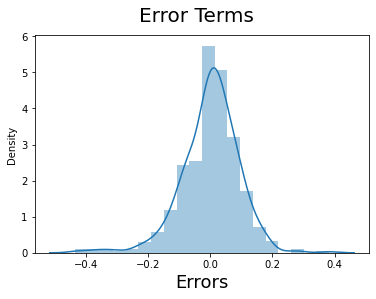

In [282]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [293]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_count)

0.8266736796322283

- The error are normally distributed with mean 0 hence our assumptions is right

### Predict the values for test data set

In [283]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

X_test[num_vars] = scaler.transform(X_test[num_vars])


In [284]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,average,bad,good
184,0,1,0,-0.048400,-0.083584,0.006745,-0.042414,-0.002451,0,0,...,0,1,0,0,0,0,0,1,0,0
535,1,0,1,-0.046286,-0.081669,0.006260,-0.040363,-0.002449,0,1,...,0,0,0,0,0,0,1,0,0,1
299,0,0,1,-0.058120,-0.090764,0.008595,-0.035037,-0.002496,0,0,...,0,0,0,0,1,0,0,1,0,0
221,0,0,1,-0.046886,-0.082910,0.004485,-0.034879,-0.002468,0,0,...,0,0,0,0,0,0,1,0,0,1
152,0,0,1,-0.048842,-0.084324,0.003225,-0.029041,-0.002466,0,1,...,0,0,0,0,1,0,0,0,0,1


In [285]:
X_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,average,bad,good
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,-0.056692,-0.089797,0.006552,-0.035653,-0.002471,0.255708,0.264840,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397,0.652968
std,0.500722,0.188034,0.459904,0.007102,0.005720,0.001529,0.004719,0.000025,0.437258,0.442259,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612,0.477117
min,0.000000,0.000000,0.000000,-0.072263,-0.103108,0.002687,-0.046162,-0.002526,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.062901,-0.094739,0.005410,-0.039041,-0.002488,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,-0.056700,-0.089372,0.006441,-0.036063,-0.002471,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,-0.050609,-0.085042,0.007633,-0.033006,-0.002454,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,-0.043761,-0.078037,0.010283,-0.021073,-0.002420,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into  X_test and y_test

In [286]:
y_test = X_test.pop('cnt')
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           219 non-null    int64  
 1   holiday      219 non-null    int64  
 2   workingday   219 non-null    int64  
 3   temp         219 non-null    float64
 4   atemp        219 non-null    float64
 5   hum          219 non-null    float64
 6   windspeed    219 non-null    float64
 7   spring       219 non-null    uint8  
 8   summer       219 non-null    uint8  
 9   winter       219 non-null    uint8  
 10  mnth_aug     219 non-null    uint8  
 11  mnth_dec     219 non-null    uint8  
 12  mnth_feb     219 non-null    uint8  
 13  mnth_jan     219 non-null    uint8  
 14  mnth_jul     219 non-null    uint8  
 15  mnth_jun     219 non-null    uint8  
 16  mnth_mar     219 non-null    uint8  
 17  mnth_may     219 non-null    uint8  
 18  mnth_nov     219 non-null    uint8  
 19  mnth_oc

In [287]:
# Selecting all the columnns that are part of final model

X_train_new_6.columns

Index(['yr', 'workingday', 'temp', 'spring', 'winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'average', 'bad'],
      dtype='object')

In [288]:
test_cols = ['yr', 'workingday', 'temp', 'spring', 'winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'average', 'bad']

X_test[test_cols]

,yr,workingday,temp,spring,winter,mnth_jul,mnth_sept,weekday_sat,average,bad
184,0,0,-0.048400,0,0,1,0,0,1,0
535,1,1,-0.046286,0,0,0,0,0,0,0
299,0,1,-0.058120,0,1,0,0,0,1,0
221,0,1,-0.046886,0,0,0,0,0,0,0
152,0,1,-0.048842,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
400,1,0,-0.065852,1,0,0,0,0,1,0
702,1,1,-0.057899,0,1,0,0,0,0,0
127,0,0,-0.055911,0,0,0,0,0,0,0
640,1,1,-0.051020,0,1,0,0,0,1,0


In [289]:
X_test = X_test[test_cols]

X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info

<bound method DataFrame.info of      const  yr  workingday      temp  spring  winter  mnth_jul  mnth_sept  \
184    1.0   0           0 -0.048400       0       0         1          0   
535    1.0   1           1 -0.046286       0       0         0          0   
299    1.0   0           1 -0.058120       0       1         0          0   
221    1.0   0           1 -0.046886       0       0         0          0   
152    1.0   0           1 -0.048842       0       0         0          0   
..     ...  ..         ...       ...     ...     ...       ...        ...   
400    1.0   1           0 -0.065852       1       0         0          0   
702    1.0   1           1 -0.057899       0       1         0          0   
127    1.0   0           0 -0.055911       0       0         0          0   
640    1.0   1           1 -0.051020       0       1         0          0   
72     1.0   0           1 -0.063603       1       0         0          0   

     weekday_sat  average  bad  
184       

In [294]:
y_test_pred = lr6.predict(X_test_lm6)

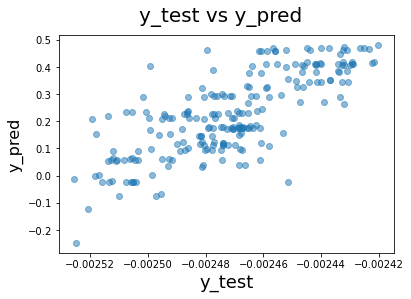

In [300]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [296]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

-118092908.04128931

###  Final Conclusion 

- Company should focus on the month of September
- Company should focus on Workingday
- The demand for bike increased by year on year. Please keep focus on this as well. 
- The varibles winter, bad weather (weatherfit 3), temperature should be properly taken into consideration because the demand may drop for these conditions